# 2. 머신러닝(2) (06.23.화)

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm            # 폰트 지정방법
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()     
plt.rc('font',family=font_name)


mpl.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split

# pip install mglearn
import mglearn
from numpy import linalg

- 귀무가설(영가설)  :  기본적인 사실로 인정된 사실. 이것을 틀렸다고 증명하기위해 존재하는 가설
- 대립가설()  : 표본을 통해 근거를 가지고 입증하고자 하는 가설. 귀무가설과 반대되는 주장을 하는 가설. 연구자가 증명하기                 위한 가설
    

## 선형회귀
    - 1) 단일선형회귀
    - 2) 다중선형회귀
    

w[0]: 0.393906  b: -0.031804


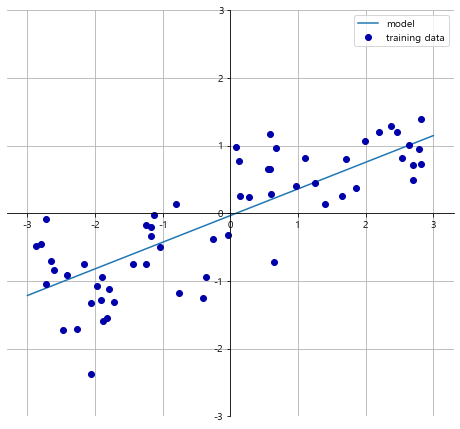

In [3]:
mglearn.plots.plot_linear_regression_wave()      # 샘플용으로 공부하라고 제공하는 함수이다.

In [11]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)  # 훈련데이터와 실제 데이터를 구별하기!

# X,y 일반적으로 데이터는 대문자로 정답은 소문자로 구별해준다.
# X_train 훈련데이터.         X_test 테스트데이터
# y_train 훈련데이터의 정답   y_test 테스트데이터의 정답




lr=LinearRegression().fit(X_train,y_train)

In [14]:
print(lr.coef_,lr.intercept_)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

[0.44153666] -0.01711124414733381
0.6592061059587275
0.6932519118518163


### 전기 생산량과 소비량

In [20]:
# 귀무가설 : 전기생산량과 소비량은 상관이 없다.  # 95%이면 귀무가설
# 대립가셜 : 전기생산량과 소비량은 상관이 있다.  # 5%에 들어가면 대립가설



# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]



In [21]:
from scipy import stats     #stats 전반적인 통계정보를 알려주는 객체
                             # 오차범위안에 들어가는지 
    
result=stats.linregress(X,y)    
result    

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

In [29]:
num=np.array(X)            # 현재는 1차원.
num=num.reshape(-1,1)     # -1 : 행은 알아서 맞추고,  1 : 열은 1개로 만들어서 2차원

lr=LinearRegression().fit(num,y)

In [30]:
lr.coef_,lr.intercept_       #  lr.coef  : 기울기,     lr.intercept_ : y절편

(array([0.49560324]), 0.919581428068942)

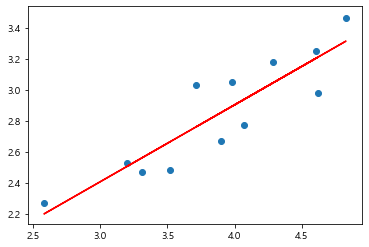

In [35]:
plt.scatter(X,y)
plt.plot(np.array(X),lr.coef_*np.array(X)+lr.intercept_,c='red')     # 기울기*X+y절편

# OLS 최소제곱법 -> 점 과 직선사이의 거리가 최소인 것.   경사하강법

In [36]:
# 생산량이 5일 때 사용량은 얼마일까?
5*lr.coef_+lr.intercept_        # x값에 생산량인 5를 대입했다. 

array([3.39759761])

### 보스턴 주택 가격

In [42]:
#https://wikidocs.net/49966

from sklearn.datasets import load_boston

boston=load_boston()
boston.data.shape

(506, 13)

In [47]:
X,y=mglearn.datasets.load_extended_boston()
X.shape
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

In [48]:
lr=LinearRegression().fit(X_train,y_train)

In [51]:
print('훈련점수: ',lr.score(X_train,y_train))
print('테스트점수: ',lr.score(X_test,y_test))

훈련점수:  0.9520519609032729
테스트점수:  0.6074721959665803


## 릿지(Ridge)회귀모델  (핸즈온 P.184)
  - L2 규제(Regularization)
  - MSE(평균제곱오차)항에 Penalty항 추가
  - 알파를 크게 하면 패널티의 효과가 커지고(가중치감소), 작게하면 그 반대가 된다.

In [54]:
# 릿지
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)    # alpha=1.0

print('훈련점수: ',ridge.score(X_train,y_train))
print('테스트점수: ',ridge.score(X_test,y_test))   # 훈련점수와 테스트점수의 차이가 많이 줄어든 것을 볼 수 있다.

훈련점수:  0.885796658517094
테스트점수:  0.7527683481744752


In [58]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)             # 알파값이 커지면 가중치가 감소한다. 
                                                         # 과대적합이면 알파값을 크게 하면된다. 
                                                         # 너무 크게하면 안되고 적당히 잘 찾아내서 해야한다. 
print('훈련점수: ',ridge10.score(X_train,y_train))
print('테스트점수: ',ridge10.score(X_test,y_test)) 

훈련점수:  0.7882787115369616
테스트점수:  0.6359411489177311


In [61]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)    
                                                        
print('훈련점수: ',ridge01.score(X_train,y_train))
print('테스트점수: ',ridge01.score(X_test,y_test)) 

훈련점수:  0.9282273685001985
테스트점수:  0.7722067936479811


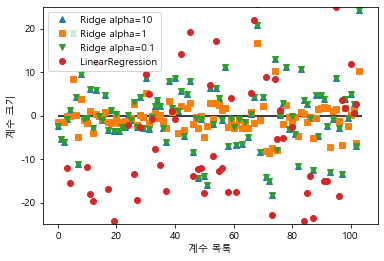

In [62]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

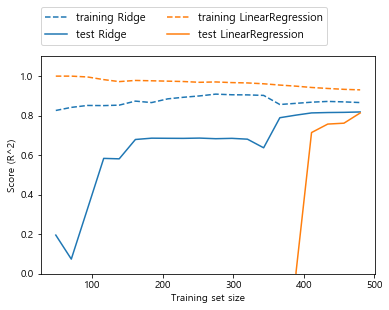

In [63]:
# 알파값을 1로 고정시킨 상태에서 데이터의 크기 조절
mglearn.plots.plot_ridge_n_samples()

## 라쏘(Lasso)회귀모델 (핸즈온 P.187)
   - L1규제 
   - 알파를 크게 하면 패널티의 효과가 커지고(가중치감소), 작게하면 그 반대가 된다. 
   - 특성 선택이 자동으로 이루어진다.

In [65]:
from sklearn.linear_model import  Lasso

lasso=Lasso().fit(X_train,y_train)    # alpha=1.0

print('훈련점수: ',lasso.score(X_train,y_train))
print('테스트점수: ',lasso.score(X_test,y_test)) 
print('사용한 특성의 수: ',np.sum(lasso.coef_ != 0))

훈련점수:  0.29323768991114607
테스트점수:  0.20937503255272294
사용한 특성의 수:  4


In [66]:
lasso001=Lasso(alpha=0.01).fit(X_train,y_train)   

print('훈련점수: ',lasso001.score(X_train,y_train))
print('테스트점수: ',lasso001.score(X_test,y_test)) 
print('사용한 특성의 수: ',np.sum(lasso001.coef_ != 0))

훈련점수:  0.8961122320864717
테스트점수:  0.7677995670886713
사용한 특성의 수:  32


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  positive)


In [67]:
lasso00001=Lasso(alpha=0.0001).fit(X_train,y_train)    # alpha 값이 작아질수록 과대적합이 커졌다. 

print('훈련점수: ',lasso00001.score(X_train,y_train))
print('테스트점수: ',lasso00001.score(X_test,y_test)) 
print('사용한 특성의 수: ',np.sum(lasso00001.coef_ != 0))

훈련점수:  0.9420931515237063
테스트점수:  0.6976541391663642
사용한 특성의 수:  100


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915621, tolerance: 3.233182126649077
  positive)


 ## 엘라스틱넷(ElasticNet)회귀모델 (핸즈온 P.190)
     - Ridge+Lasso

### 다중선형회귀. 보스턴주택가격

In [68]:
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [69]:
model_boston=LinearRegression().fit(boston.data,boston.target)

In [71]:
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [73]:
df=pd.DataFrame(boston.data, columns=[boston.feature_names])
df.head(10)
df['MEDV']=boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\acorn\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


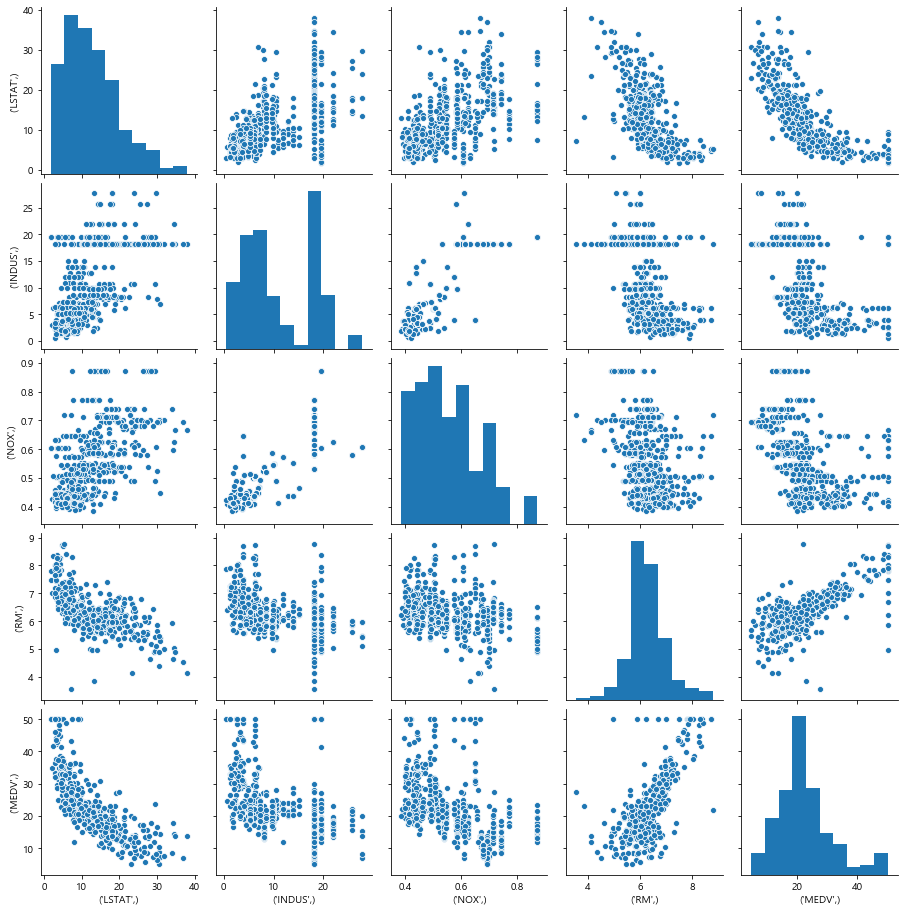

In [74]:
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],size=2.5)

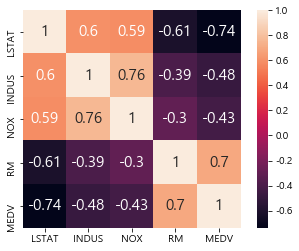

In [82]:
cc=np.corrcoef(df[cols].values.T)        
cc            # 대각선 쪽으로는 다 1인것을 볼 수 있다.
sns.heatmap(cc,yticklabels=cols,xticklabels=cols,annot=True,square=True,annot_kws={'size':15})

In [87]:
# 방이 10개 일 때 집값을 몇 달러 인가?
X=df[['RM']].values
y=df[['MEDV']].values

lr=LinearRegression().fit(X,y)

In [88]:
house_price=lr.predict(np.array([[10]]))
print(house_price*1000)

[[56350.46903536]]


## 분류형 모델
### 로지스틱 회귀 모델  
    - 0과 1사이에서 값을 처리하는 sigmoid를 사용
    - sigmoid는 0과 1사이라서 제약이 있다.

### SVM에서 제공하는 회귀모델

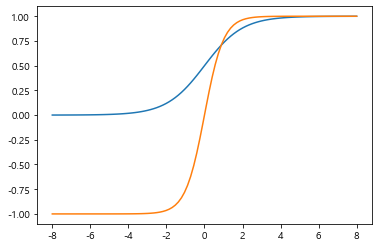

In [94]:
def sigmoid(x):
    result=[]
    for i in x:
        result.append(1/(1+np.exp(-i)))
    return result    

x=np.linspace(-8,8,100)
sig=sigmoid(x)
plt.plot(x,sig)
plt.plot(x,np.tanh(x))   # tanh -> 범위를 넓혀서 sigmoid의 단점을 보완 

In [3]:
from sklearn.linear_model import LogisticRegression    # 회귀알고리즘
from sklearn.svm import LinearSVC                      # 회귀알고리즘

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


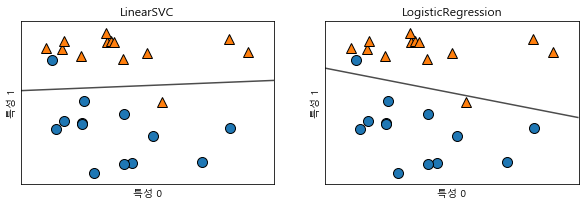

In [103]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))     #(1,2) 한행에 2개의 그래프를 그리겠다는 뜻.
 
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

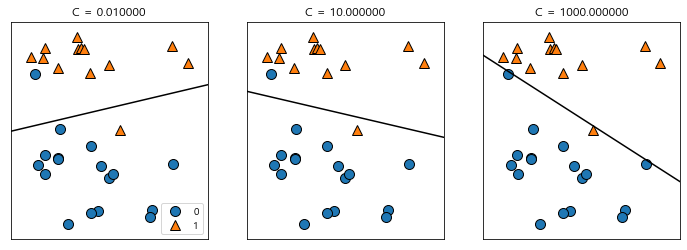

In [104]:
mglearn.plots.plot_linear_svc_regularization()

In [108]:
#https://wikidocs.net/43332

from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, random_state=42,stratify=cancer.target)

# stratify =?? 

In [114]:
logreg=LogisticRegression(C=100,penalty='l2').fit(X_train,y_train)   # 디폴트값:  C=1  ,  penalty(규제)='l2' 
# C는 규제의 강도를 조절하는 기능을 한다.  모델을 단순화하도록 규제를 강도를 높힌다. 


print('훈련점수: ', logreg.score(X_train,y_train))
print('테스트점수: ', logreg.score(X_test,y_test))

훈련점수:  0.9460093896713615
테스트점수:  0.958041958041958


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [115]:
logreg=LogisticRegression(C=0.01,penalty='l2').fit(X_train,y_train)   # 디폴트값:  C=1  ,  penalty(규제)='l2' 

print('훈련점수: ', logreg.score(X_train,y_train))
print('테스트점수: ', logreg.score(X_test,y_test))

훈련점수:  0.9342723004694836
테스트점수:  0.9300699300699301


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [119]:
logreg_l1=LogisticRegression(C=1,penalty='l1',solver='liblinear').fit(X_train,y_train)   # 디폴트값:  C=1  ,  penalty(규제)='l2' 

print('훈련점수: ', logreg_l1.score(X_train,y_train))
print('테스트점수: ', logreg_l1.score(X_test,y_test))

훈련점수:  0.960093896713615
테스트점수:  0.958041958041958


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [120]:
logreg_l1= LogisticRegression(C=100, penalty = "l1",solver='liblinear').fit(X_train, y_train)   
                               # 디폴트로 들어가있는 하이퍼파라미터 : C=1, Penalty = "l2"

print("훈련점수 : ", logreg_l1.score(X_train, y_train))
print("테스트점수:" , logreg_l1.score(X_test, y_test))

훈련점수 :  0.9859154929577465
테스트점수: 0.9790209790209791


In [122]:
logreg001_l1=LogisticRegression(C=0.01,penalty='l1',solver='liblinear').fit(X_train,y_train)   # 디폴트값:  C=1  ,  penalty(규제)='l2' 


print('훈련점수: ',logreg001_l1.score(X_train,y_train))
print('테스트점수: ', logreg001_l1.score(X_test,y_test))

훈련점수:  0.9178403755868545
테스트점수:  0.9300699300699301


## 다중클래스 분류(여러개 중 하나를 선택해야하는 것을 의미)

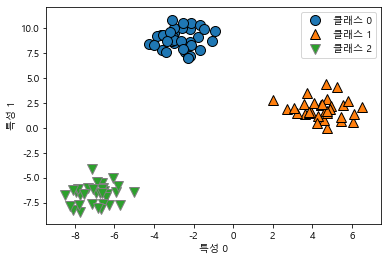

In [123]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [125]:
linear_svm=LinearSVC().fit(X,y)
print(linear_svm.coef_)        #2진분류를 3번 사용. 1.(파,초)(노)   2.(노.초)(파)   3.(파,노)(초)

[[-0.17492451  0.23141039]
 [ 0.47621825 -0.06937297]
 [-0.18914523 -0.20399665]]


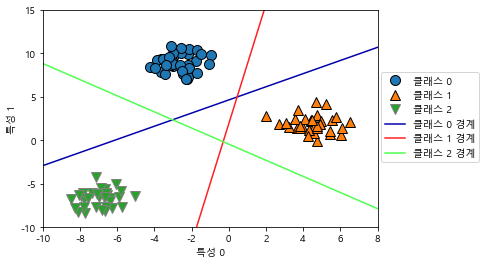

In [127]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))

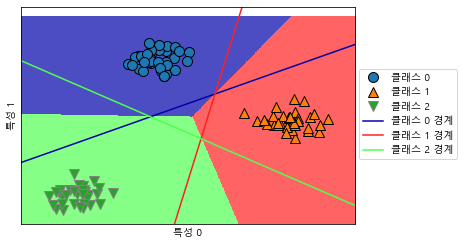

In [128]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))

## 적합도검정 (핸즈온 p.135)
    1) Accuracy
    
    2) Precision 
       : 실제 Negative 인 데이터예측을 Positiveㅇ로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(FP를 낮추는데 초점          을 맞춘방식)
    
    3) Recall
       : 실제 Positive인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(FN을 낮추는데 초점을          맞춘방식)
    4) F1Score

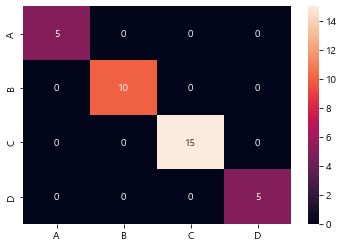

In [135]:
array=[[5,0,0,0],[0,10,0,0],[0,0,15,0],[0,0,0,5]]

df_cm=pd.DataFrame(array,index=[i for i in 'ABCD'],columns=[i for i in 'ABCD'])
df_cm
sns.heatmap(df_cm,annot=True)

In [138]:
array=[[9,1,0,0],[1,15,3,1],[5,0,24,1],[0,4,1,15]]

df_cm=pd.DataFrame(array,index=[i for i in 'ABCD'],columns=[i for i in 'ABCD'])
df_cm
#sns.heatmap(df_cm,annot=True)

# 행 'ABCD'는 입력값 ,  열 'ABCD'는 결과값

,A,B,C,D
A,9,1,0,0
B,1,15,3,1
C,5,0,24,1
D,0,4,1,15


In [140]:
total= np.sum(array,axis=1)
array=array/total[:,None]
array

array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.2       , 0.05      , 0.75      ]])

In [142]:
# 위에 한것을 %로  표현하기

df_cm=pd.DataFrame(array,index=[i for i in 'ABCD'],columns=[i for i in 'ABCD'])
df_cm
#sns.heatmap(df_cm,annot=True)

# 행 'ABCD'는 입력값 ,  열 'ABCD'는 결과값

,A,B,C,D
A,0.900000,0.10,0.00,0.000000
B,0.050000,0.75,0.15,0.050000
C,0.166667,0.00,0.80,0.033333
D,0.000000,0.20,0.05,0.750000


In [12]:
from sklearn.metrics import confusion_matrix

y_true=[2,0,2,2,0,1]
y_pred=[0,0,2,2,0,2]


confusion_matrix(y_true,y_pred)       # 행-> 0,1,2.  열-> 0,1,2     0을 0이라고 예측한 것이 2개
                                      #                             2를 0이라고 예측한것이 1개  

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [149]:
y_true=[1,0,1,1,0,1]
y_pred=[0,0,1,1,0,1]

confusion_matrix(y_true,y_pred)    # 각 행,열 레이블 순서는 0,1이다.

#만약 순서를 바꾸고 싶으면
confusion_matrix(y_true,y_pred,labels=[1,0])    # labels=[1,0] 순서바꿈


array([[3, 1],
       [0, 2]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report

y_true=[0,0,0,1,0,0,0]
y_pred=[0,0,0,0,1,1,1]

print(classification_report(y_true,y_pred,target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.50      0.60         6
     class 1       0.00      0.00      0.00         1

    accuracy                           0.43         7
   macro avg       0.38      0.25      0.30         7
weighted avg       0.64      0.43      0.51         7



## ROC 그래프(시각화해주는 그래프)   (핸즈온 P.141)

In [1]:
# ROC 그래프(시각화해주는 그래프)   (핸즈온 P.141)
# 선이 그래프 모서리(구석)에 가까워질수록, 가운데에도 멀어질 수록 성능이 좋은것
# ROC그래프는 이진분류에서만 가능하다. 다중분류에서는 이 그래프를 사용할 수 없다. 

from sklearn.datasets import make_classification

X, y=make_classification(n_samples=100, n_features=2,n_informative=2,n_redundant=0,random_state=0)

In [4]:
model=LogisticRegression().fit(X,y)

In [5]:
y_hat=model.predict(X)

In [6]:
print(y_hat[:40])
print(y[:40])

[0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0
 1 1 1]
[0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0
 1 1 1]


In [13]:
confusion_matrix(y,y_hat)

array([[48,  2],
       [ 5, 45]], dtype=int64)

In [14]:
print(classification_report(y,y_hat))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        50
           1       0.96      0.90      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [151]:
정밀도 = 타당도=precision
재현율 = 신뢰도=recall

NameError: name 'precision' is not defined